In [88]:
#load required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Load dataset
fb = pd.read_csv("C:\\Users\\12162\\Documents\\BU\\DSC 350\\Week 7\\data\\fb_stock_prices_2018.csv", index_col='date', parse_dates=True)
fb.head()

,open,high,low,close,volume
date,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903
2018-01-03,181.88,184.78,181.3300,184.67,16886563
2018-01-04,184.90,186.21,184.0996,184.33,13880896
2018-01-05,185.59,186.90,184.9300,186.85,13574535
2018-01-08,187.20,188.90,186.3300,188.28,17994726


In [89]:
#Question 1
#filter by close column and ascending order
fb.sort_values(by='close', ascending=True)

,open,high,low,close,volume
date,,,,,
2018-12-24,123.100,129.74,123.0200,124.06,22066002
2018-12-21,133.390,134.90,123.4200,124.95,56901491
2018-12-31,134.450,134.64,129.9500,131.09,24625308
2018-11-19,137.610,137.75,131.2100,131.55,44362729
2018-11-23,133.650,134.50,131.2551,131.73,11886128
...,...,...,...,...,...
2018-07-20,208.850,211.50,208.5000,209.94,16241508
2018-07-17,204.900,210.46,204.8400,209.99,15349892
2018-07-23,210.580,211.62,208.8000,210.91,16731969


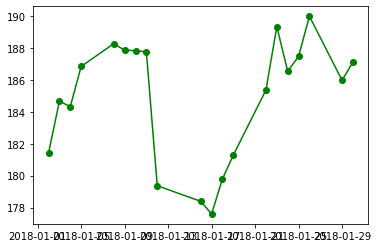

In [90]:
#Plot 20-day minimum of Facebook closing price
plt.plot('close', color='green', marker='o', data=fb.head(20))

In [91]:
close_rolling_min = fb.pivot_table(
    index=fb.index, 
    columns='close', 
    values='low'
).rolling(20).min()

In [92]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5)

close_rolling_min['close'].plot(ax=axes[0], style='-.c', title='20-day rolling minimum of Facebook Closing Price')


SyntaxError: invalid syntax (Temp/ipykernel_23144/2025232928.py, line 3)

Text(0.5, 0, 'Open and Close Price')

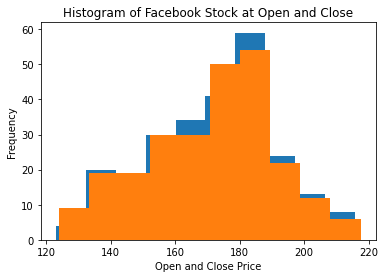

In [93]:
#Question 2
#Histogram of the change from open to close in the price of Facebook stock.
fb.open.plot(
    kind='hist', 
    title='Histogram of Facebook Stock at Open and Close'
)
plt.xlabel('Open and Close Price') # label the x-axis (discussed in chapter 6)

fb.close.plot(
    kind='hist', 
    title='Histogram of Facebook Stock at Open and Close'
)
plt.xlabel('Open and Close Price') # label the x-axis (discussed in chapter 6)

Text(0.5, 0, 'Price ($)')

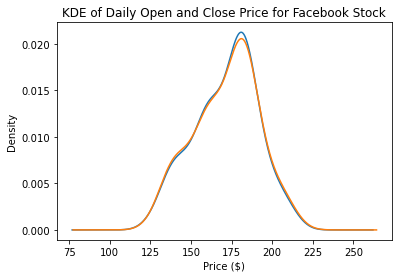

In [94]:
#KDE of the change from open to close in the price of Facebook stock.
fb.open.plot(
    kind='kde', 
    title='KDE of Daily Open and Close Price for Facebook Stock'
)
plt.xlabel('Price ($)') # label the x-axis (discussed in chapter 6)

fb.close.plot(
    kind='kde', 
    title='KDE of Daily Open and Close Price for Facebook Stock'
)
plt.xlabel('Price ($)') # label the x-axis (discussed in chapter 6)

In [95]:
#Question 3
#Load dataset
eq = pd.read_csv("C:\\Users\\12162\\Documents\\BU\\DSC 350\\Week 7\\data\\earthquakes.csv")
eq.head()

,mag,magType,time,place,tsunami,parsed_place
0,1.35,ml,1539475168010,"9km NE of Aguanga, CA",0,California
1,1.29,ml,1539475129610,"9km NE of Aguanga, CA",0,California
2,3.42,ml,1539475062610,"8km NE of Aguanga, CA",0,California
3,0.44,ml,1539474978070,"9km NE of Aguanga, CA",0,California
4,2.16,md,1539474716050,"10km NW of Avenal, CA",0,California


In [96]:
#Filtering data with appropriate columns
new_eq = eq.loc[(eq.parsed_place == 'Indonesia')]

new_eq.head()

,mag,magType,time,place,tsunami,parsed_place
9,4.7,mb,1539472814760,"219km SSE of Saparua, Indonesia",0,Indonesia
13,4.5,mb,1539470898340,"120km SSW of Banda Aceh, Indonesia",0,Indonesia
180,5.2,mww,1539405255580,"25km E of Bitung, Indonesia",0,Indonesia
421,4.7,mb,1539331098920,"38km SSW of Nggongi Satu, Indonesia",0,Indonesia
660,4.4,mb,1539258833830,"51km WSW of Kasiguncu, Indonesia",0,Indonesia


Text(0, 0.5, 'magnitude')

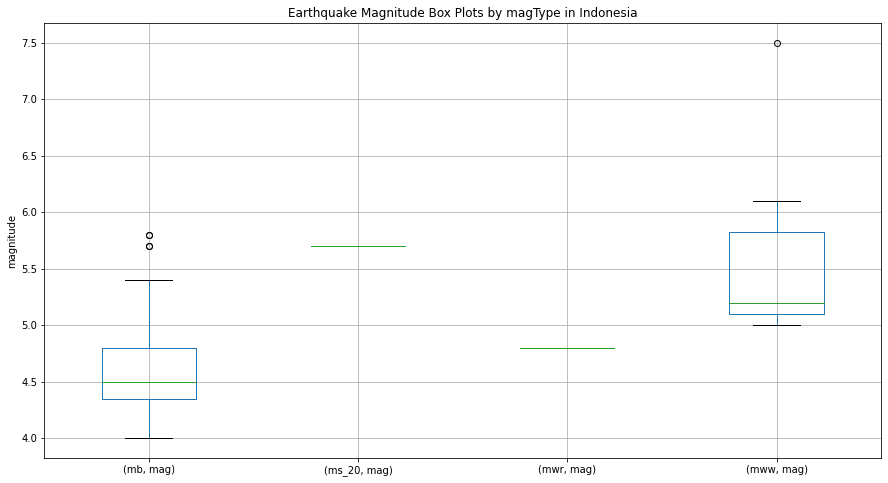

In [97]:
#Box plots for the magnitudes of each magType used in Indonesia
new_eq[['mag', 'magType']].groupby('magType').boxplot(
    figsize=(15, 8), subplots=False
)
plt.title('Earthquake Magnitude Box Plots by magType in Indonesia')
plt.ylabel('magnitude') #label the y-axis

<AxesSubplot:title={'center':'Facebook Daily High - Low'}, xlabel='volume'>

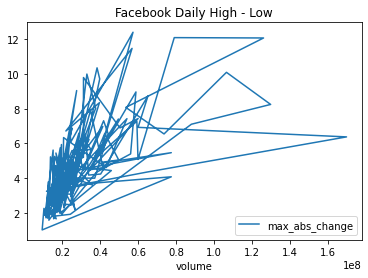

In [98]:
#Question 4
#Difference of weekly maximum high price and the weekly minimum low price for Facebook. 
fb.assign(
    max_abs_change=fb.high - fb.low
).plot(
    kind='line', x='volume', y='max_abs_change',
    title='Facebook Daily High - Low'
)

In [100]:
#Question 5
#Adding appropraite columns
fb.assign(
    prior_close=lambda x: x.close.shift(),
    after_hours_change_in_price=lambda x: x.open - x.prior_close,
    abs_change=lambda x: x.after_hours_change_in_price.abs()).nlargest(5, 'abs_change')

,open,high,low,close,volume,prior_close,after_hours_change_in_price,abs_change
date,,,,,,,,
2018-07-26,174.89,180.13,173.75,176.26,169803668,217.50,-42.61,42.61
2018-04-26,173.22,176.27,170.80,174.16,77556934,159.69,13.53,13.53
2018-01-12,178.06,181.48,177.40,179.37,77551299,187.77,-9.71,9.71
2018-10-31,155.00,156.40,148.96,151.79,60101251,146.22,8.78,8.78
2018-03-19,177.01,177.17,170.06,172.56,88140060,185.09,-8.08,8.08


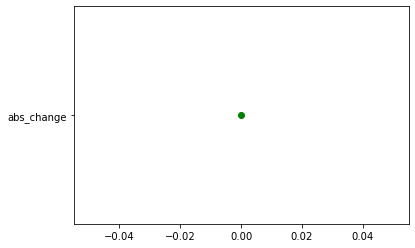

In [107]:
plt.plot('abs_change', color='green', marker='o', data=fb.head(100))

In [111]:
from sklearn.utils import resample

In [113]:
#Monthly using Resample
fb.resample('30D').agg({
    'open': 'first', 'high': 'max', 'low': 'min', 'close': 'last', 'volume': 'sum'}) 

,open,high,low,close,volume
date,,,,,
2018-01-02,177.680,190.6600,175.8000,186.89,495655736
2018-02-01,188.220,195.3200,167.1800,176.62,559849522
2018-03-03,176.200,186.1000,149.0200,159.79,953004941
2018-04-02,157.810,177.1000,150.5100,173.86,777156320
2018-05-02,174.246,192.7200,172.1200,191.78,375118251
2018-06-01,193.065,203.5500,186.4300,194.32,387265765
2018-07-01,193.370,218.6200,166.5600,171.06,612406788
2018-07-31,170.670,188.3000,170.0000,175.90,547091569
2018-08-30,175.900,179.7901,158.8656,164.46,542750603
